
This is a digital architecture based on the paper "A 95.6-TOPS/W Deep Learning Inference
Accelerator With Per-Vector Scaled 4-bit Quantization in 5 nm" created by Simon Opsahl, 
Christina Crow, and Carlos Villa. 

Some of the important variables for scc_proj_2025:

- *TECHNOLOGY*: 5nm nm
- *SUPPORTED_INPUT_BITS*: 8 bit(s)
- *SUPPORTED_OUTPUT_BITS*: 16 bit(s)
- *SUPPORTED_WEIGHT_BITS*: 8 bit(s)
- *GLOBAL_CYCLE_SECONDS*: 1.1e-09 clock period

Components are defined the following places:
- workspace/models/arch/1_macro/scc_proj_2025/example_components/components.csv
- workspace/models/arch/1_macro/scc_proj_2025/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!



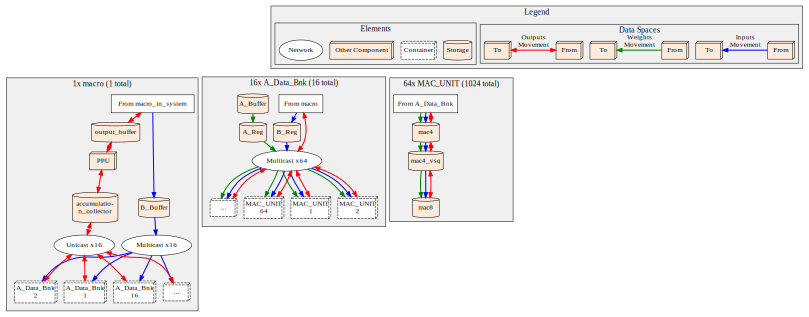

In [1]:
from _tests import scripts
from scripts.notebook_utils import *
import helper_functions

display_markdown(
    f"""
This is a digital architecture based on the paper "A 95.6-TOPS/W Deep Learning Inference
Accelerator With Per-Vector Scaled 4-bit Quantization in 5 nm" created by Simon Opsahl, 
Christina Crow, and Carlos Villa. 

{get_important_variables_markdown('scc_proj_2025')}

Components are defined the following places:
- workspace/models/arch/1_macro/scc_proj_2025/example_components/components.csv
- workspace/models/arch/1_macro/scc_proj_2025/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!

"""
)
display_diagram(get_diagram("scc_proj_2025", ignore=DIAGRAM_DEFAULT_IGNORE))

In [2]:
# REMEMBER TO SET PRECISION, VS, & HIDDEN_DIM IN variables_iso.yaml AND SET ENABLE_? = True for each one
def get_results(precision=4):
    results = {}
    print('Generating Energy Breakdown')
    results['energy'] = run_test("scc_proj_2025", "test_mm_energy_breakdown", bitwidth = precision).per_component_energy
    print(results['energy'])
    print('Generating voltage sweep')
    results["voltage_tops"], results["voltages"] = run_test("scc_proj_2025", "sweep_voltages", precision=precision)
    print(results["voltage_tops"])
    print('Generating technology sweep')
    results["technology_tops"], results["technology_areas"], results["technologies"] = run_test("scc_proj_2025", "sweep_technologies", precision=precision)
    print(results["technology_tops"])
    print(results["technology_areas"])
    return results

In [3]:
# REMEMBER TO SET PRECISION, VS, & HIDDEN_DIM IN variables_iso.yaml AND SET ENABLE_INT4 = True
int4_results = get_results()

Generating Energy Breakdown


{'mac4': 4.78150656e-08, 'A_Reg': 7.61266176e-09, 'A_Buffer': 8.7031808e-09, 'B_Buffer': 1.054867456e-08, 'accumulation_collector': 1.44703488e-08, 'PPU': 6.10271232e-11, 'output_buffer': 3.79584512e-11, 'main_memory': 2.097152e-06}
Generating voltage sweep


[1.4257355997282661, 1.2356613852851515, 1.0492844719328998, 0.8970991402201839, 0.7348082797021264, 0.5973704231867657, 0.4717757336678789, 0.38195322936871995, 0.31541984147251106]
Generating technology sweep


[0.7348082797021264, 0.6205149181714567, 0.5053723098021204, 0.13642576713845975, 0.17201774892894867, 0.08266539692616988, 0.04637269101096918]
[9.834394079999999e-08, 1.3768145399999998e-07, 2.077497248e-07, 5.94975822e-07, 7.0192448e-07, 1.4692287960000001e-06, 3.6330625879999994e-06]


In [4]:
# REMEMBER TO SET PRECISION, VS, & HIDDEN_DIM IN variables_iso.yaml AND SET ENABLE_INT4VSQ = True
int4VSQ_results = get_results()

Generating Energy Breakdown


{'mac4_vsq': 4.84442112e-08, 'A_Reg': 7.61266176e-09, 'A_Buffer': 8.7031808e-09, 'B_Buffer': 1.054867456e-08, 'accumulation_collector': 1.44703488e-08, 'PPU': 6.10271232e-11, 'output_buffer': 3.79584512e-11, 'main_memory': 2.097152e-06}
Generating voltage sweep


[1.412843812716137, 1.2259661594109086, 1.0388202990472772, 0.8919779074911871, 0.7296611336949339, 0.5917148559245331, 0.46824125587549126, 0.3787130542692777, 0.3125803331456184]
Generating technology sweep


[0.7296611336949339, 0.6156252585626085, 0.5013186686259538, 0.13524491013895387, 0.17014460385708288, 0.08201453953756922, 0.04603115683293856]
[1.491142704e-07, 2.08759854e-07, 3.28077712e-07, 1.0939443980000001e-06, 1.05261376e-06, 2.26950118e-06, 5.437978299999999e-06]


In [5]:
# REMEMBER TO SET PRECISION, VS, & HIDDEN_DIM IN variables_iso.yaml AND SET ENABLE_INT8 = True
int8_results = get_results(precision=8)

Generating Energy Breakdown


{'mac8': 6.59554304e-08, 'A_Reg': 7.61266176e-09, 'A_Buffer': 8.71366656e-09, 'B_Buffer': 1.05906176e-08, 'accumulation_collector': 1.44703488e-08, 'PPU': 6.144655359999999e-11, 'output_buffer': 7.31906048e-11, 'main_memory': 1.048576e-06}
Generating voltage sweep


[0.07502943554815425, 0.06486750837361692, 0.05471934665975599, 0.04675567950590094, 0.038132151761327136, 0.0308922675418652, 0.024387845566016534, 0.019728535353535352, 0.01624686500492865]
Generating technology sweep


[0.038132151761327136, 0.032255707144190134, 0.026181493295191857, 0.006676688465075257, 0.008804562933043623, 0.004208368795854386, 0.002415544823236227]
[9.38189872e-08, 1.313466316e-07, 1.9702568e-07, 5.50505038e-07, 6.7066944e-07, 1.397904636e-06, 3.4722003799999997e-06]


In [6]:
# save results
def plot_energy_efficiency_vs_voltage(efficiencies,voltages):
    """
    Plots efficiences (TOPS/W) vs voltages (V)
    Parameters:
        efficiencies (dict(str,list)): dictionary of lists with keys designating the datapath used and value being a list
                                       of efficiency values. Only accepts keys in ["int8", "int4", "int4vsq"].
        voltages (list): list of voltages aligned with efficiency values
    returns:
        None (graph displayed)
    """
    for key in efficiencies.keys():
        assert key in ["int8", "int4", "int4vsq"]

    int8 = efficiencies["int8"] 
    int4 = efficiencies["int4"] 
    int4_vsq = efficiencies["int4vsq"]

    plt.figure(figsize=(8,6))
    plt.plot(voltages, int8, 'o-', label='INT8')
    plt.plot(voltages, int4, 's--', label='INT4')
    plt.plot(voltages, int4_vsq, 'd-.', label='INT4-VSQ')

    plt.xlabel('Voltage (V)')
    plt.ylabel('Normalized Energy Efficiency (TOPS/W)')
    plt.title('Energy Efficiency vs. Voltage')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_energy_efficiency_vs_technology(efficiencies,technologies):
    """
    Plots efficiences (TOPS/W) vs technologies (nm)
    Parameters:
        efficiencies (dict(str,list)): dictionary of lists with keys designating the datapath used and value being a list
                                       of efficiency values. Only accepts keys in ["int8", "int4", "int4vsq"].
        technologies (list): list of technologies aligned with efficiency values
    returns:
        None (graph displayed)
    """
    for key in efficiencies.keys():
        assert key in ["int8", "int4", "int4vsq"]

    int8 = efficiencies["int8"] 
    int4 = efficiencies["int4"] 
    int4_vsq = efficiencies["int4vsq"]

    plt.figure(figsize=(8,6))
    plt.plot(technologies, int8, 'o-', label='INT8')
    plt.plot(technologies, int4, 's--', label='INT4')
    plt.plot(technologies, int4_vsq, 'd-.', label='INT4-VSQ')

    plt.xlabel('Technology (nm)')
    plt.ylabel('Normalized Energy Efficiency (TOPS/W)')
    plt.title('Energy Efficiency vs. Technology')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_area_vs_technology(areas,technologies):
    """
    Plots areas (mm^2) vs technologies (nm)
    Parameters:
        areas (dict(str,list)): dictionary of lists with keys designating the datapath used and value being a list
                                       of area values. Only accepts keys in ["int8", "int4", "int4vsq"].
        technologies (list): list of technologies aligned with efficiency values
    returns:
        None (graph displayed)
    """
    for key in areas.keys():
        assert key in ["int8", "int4", "int4vsq"]

    int8 = areas["int8"] 
    int4 = areas["int4"] 
    int4_vsq = areas["int4vsq"]

    plt.figure(figsize=(8,6))
    plt.plot(technologies, int8, 'o-', label='INT8')
    plt.plot(technologies, int4, 's--', label='INT4')
    plt.plot(technologies, int4_vsq, 'd-.', label='INT4-VSQ')

    plt.xlabel('Technology (nm)')
    plt.ylabel('Normalized Area')
    plt.title('Area vs. Technology')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [7]:
# Normalize energies

normalization_component = "mac4"

norm_factor = int4_results['energy'][normalization_component]

def normalize_dicts(energies,norm_factor):
    norm_dict = {}
    other = 0
    for comp,energy in energies.items():
        if comp in ["mac4", "mac4_vsq" , "mac8"]:
            norm_dict["Datapath"] = energy/norm_factor
        elif comp in ["A_Buffer", "B_Buffer", "accumulation_collector"]:
            norm_dict[comp] = energy/norm_factor
        elif comp != "main_memory":
            other+=energy
    norm_dict["other"] = other/norm_factor

    return norm_dict
int8_norm = normalize_dicts(int8_results['energy'], norm_factor*0.5)
int4_norm = normalize_dicts(int4_results['energy'], norm_factor)
int4vsq_norm = normalize_dicts(int4VSQ_results['energy'], norm_factor)

energy_breakdown = helper_functions.generate_pd_table([int8_norm,int4_norm,int4vsq_norm], ["INT8","INT4","INT4-VSQ"])

energy_breakdown_rounded = energy_breakdown.round(2)
print(energy_breakdown_rounded )

          Datapath  A_Buffer  B_Buffer  accumulation_collector  other
INT8          2.76      0.36      0.44                    0.61   0.32
INT4          1.00      0.18      0.22                    0.30   0.16
INT4-VSQ      1.01      0.18      0.22                    0.30   0.16


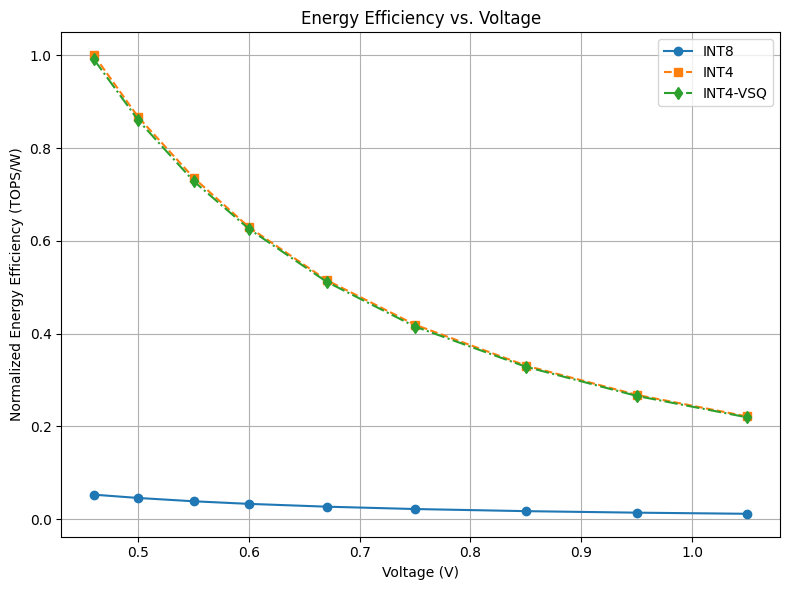

In [8]:
## Plot Voltages
int4_efficiencies = int4_results['voltage_tops']
int4VSQ_efficiencies = int4VSQ_results['voltage_tops']
int8_efficiencies = int8_results['voltage_tops']
norm = int4_efficiencies[0] # 0.67 at int4 bit datapath

voltages = int4_results['voltages']

plot_energy_efficiency_vs_voltage({
    'int4':[efficiency/norm for efficiency in int4_efficiencies],
    'int8':[efficiency/norm for efficiency in int8_efficiencies],
    'int4vsq':[efficiency/norm for efficiency in int4VSQ_efficiencies]
},
voltages
)

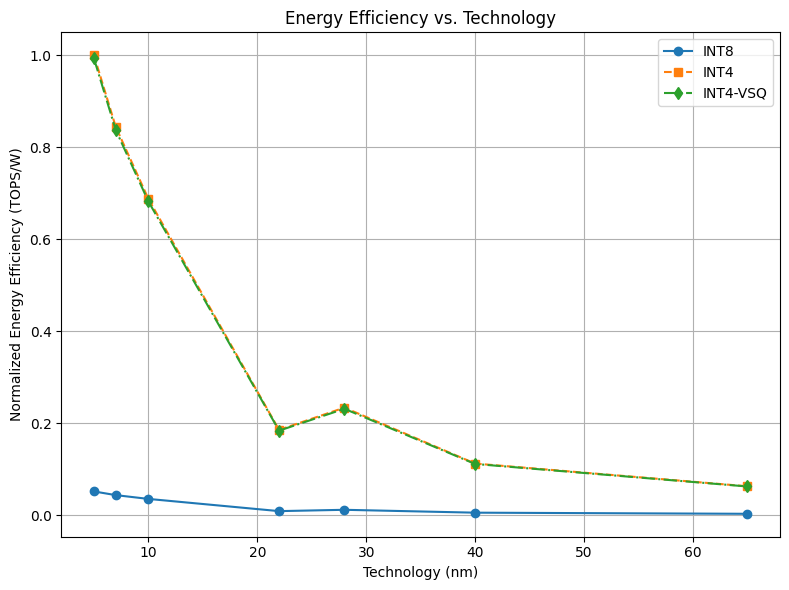

In [9]:
int4_efficiencies = int4_results['technology_tops']
int4VSQ_efficiencies = int4VSQ_results['technology_tops']
int8_efficiencies = int8_results['technology_tops']
norm = int4_efficiencies[0] # 0.67 at int4 bit datapath

technologies = int4_results['technologies']

plot_energy_efficiency_vs_technology({
    'int4':[efficiency/norm for efficiency in int4_efficiencies],
    'int8':[efficiency/norm for efficiency in int8_efficiencies],
    'int4vsq':[efficiency/norm for efficiency in int4VSQ_efficiencies]
},
technologies
)

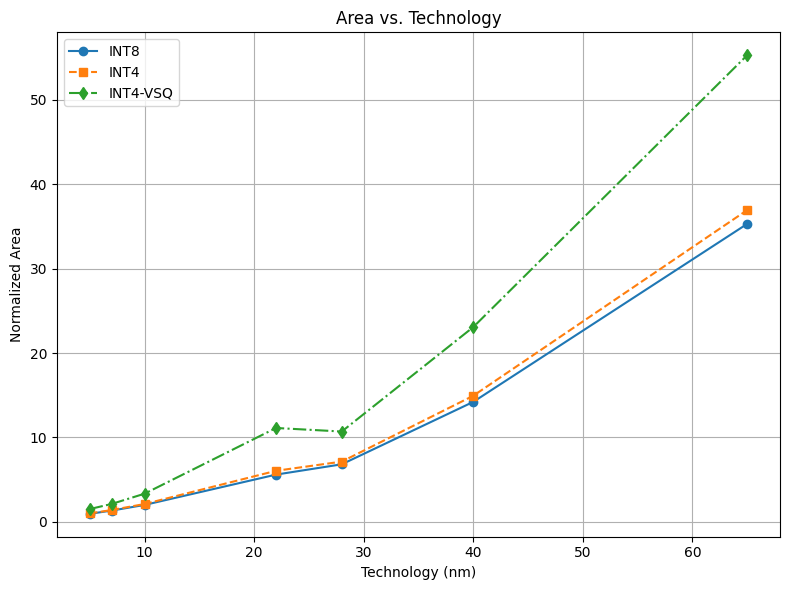

In [10]:
int4_areas = int4_results['technology_areas']
int4VSQ_areas = int4VSQ_results['technology_areas']
int8_areas = int8_results['technology_areas']
norm = int4_areas[0] # 0.67 at int4 bit datapath

technologies = int4_results['technologies']

plot_area_vs_technology({
    'int4':[technology_area/norm for technology_area in int4_areas],
    'int8':[technology_area/norm for technology_area in int8_areas],
    'int4vsq':[technology_area/norm for technology_area in int4VSQ_areas]
},
technologies)

## Datapath Sweep

In [15]:
# REMEMBER TO SET PRECISION, VS, & HIDDEN_DIM IN variables_iso.yaml AND SET ENABLE_INT4VSQ = True
int4VSQ_64 = run_test("scc_proj_2025", "test_datapath")
print(int4VSQ_64)

0.7296611336949339


In [16]:
# Change VS to 32
int4VSQ_32 = run_test("scc_proj_2025", "test_datapath")
print(int4VSQ_32)

0.6280233041863531


In [17]:
int4VSQ_16 = run_test("scc_proj_2025", "test_datapath")
print(int4VSQ_16)

0.49056775564859345


In [18]:
int4VSQ_8 = run_test("scc_proj_2025", "test_datapath")
print(int4VSQ_8)

0.3414684783618255


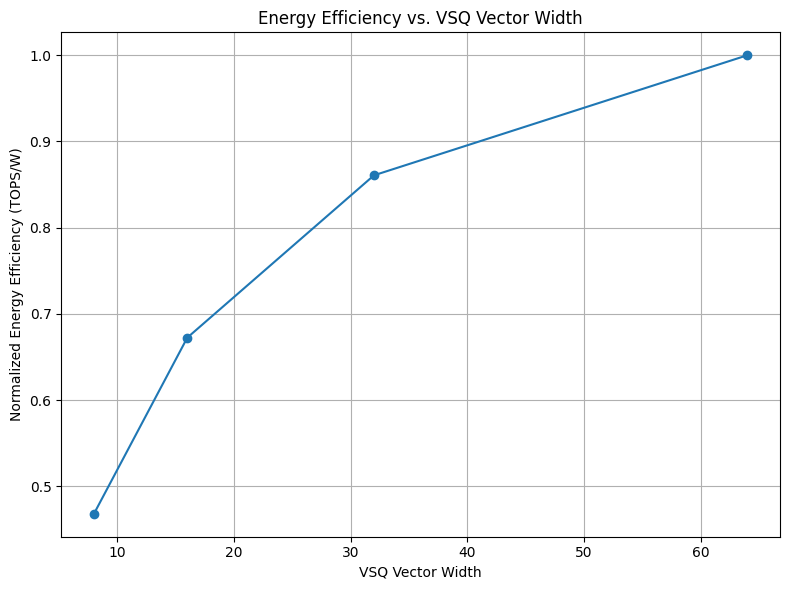

In [19]:
plt.figure(figsize=(8,6))
plt.plot([8, 16, 32, 64], [efficiency/int4VSQ_64 for efficiency in [int4VSQ_8, int4VSQ_16, int4VSQ_32, int4VSQ_64]], 'o-')

plt.xlabel('VSQ Vector Width')
plt.ylabel('Normalized Energy Efficiency (TOPS/W)')
plt.title('Energy Efficiency vs. VSQ Vector Width')
plt.grid(True)
plt.tight_layout()
plt.show()